In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/maintenance_data.csv", sep=";")
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [3]:
label_encoder = LabelEncoder()
df["team_encoded"] = label_encoder.fit_transform(df["team"])
df["provider_encoded"] = label_encoder.fit_transform(df["provider"])
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider,team_encoded,provider_encoded
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4,0,3
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4,2,3
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1,0,0
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2,2,1
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1,1,0


In [4]:
features = df.drop(columns=["broken", "team", "provider"])
target = df["broken"]
features.head()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=50)


In [29]:
# Decision Tree Model
model_dtree = DecisionTreeClassifier(max_depth=10)
model_dtree.fit(X_train, y_train)

model_svm = LinearSVC(C=1.0)
model_svm.fit(X_train, y_train)

model_knn = KNeighborsClassifier(n_neighbors=16)
model_knn.fit(X_train, y_train)

/home/deepansh/git/predictive_maintenance/venv/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/deepansh/git/predictive_maintenance/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNeighborsClassifier(n_neighbors=16)

In [11]:
y_pred_dtree = model_dtree.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

models = ['Decision Tree', 'SVM', 'KNN']
predictions = [y_pred_dtree, y_pred_svm, y_pred_knn]

for model, y_pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{model} Scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

Decision Tree Scores:
Accuracy: 0.9600
Precision: 0.9603
Recall: 0.9600
F1 Score: 0.9601

SVM Scores:
Accuracy: 0.6880
Precision: 0.8312
Recall: 0.6880
F1 Score: 0.6833

KNN Scores:
Accuracy: 0.8560
Precision: 0.8567
Recall: 0.8560
F1 Score: 0.8563



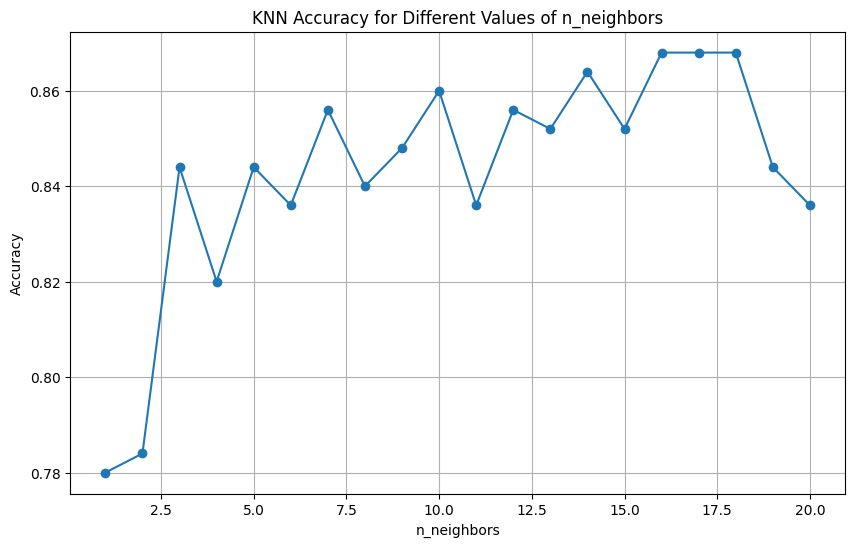

In [28]:
# Define a range of n_neighbors values
n_neighbors_values = np.arange(1, 21)
accuracy_scores = []

# Iterate over different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Create KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Measure accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.title('KNN Accuracy for Different Values of n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()